In [1]:
import pandas as pd
import numpy as np
import itertools
import pymannkendall as mk
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the full dataset
file_path = r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv'
df = pd.read_csv(file_path)

# === Step 1: Reclassify Regions ===
def classify_region(region):
    """Classify regions into Peninsula, East Antarctica, or West Antarctica"""
    if 'peninsula' in region.lower():
        return 'Peninsula'
    elif 'east' in region.lower():
        return 'East Antarctica'
    else:
        return 'West Antarctica'

df['Region_Class'] = df['Regions'].apply(classify_region)

In [5]:
from sklearn.inspection import permutation_importance, partial_dependence

# === Step 2: Train Models & Compute Feature Importance ===
base_variables = ['temperature_2m', 'solar_radiation', 'uv_radiation', 'volumetric_soil_water', 'runoff',
                  'X10m_wind_speed', 'precipitation', 'vapor_pressure_deficit']

region_models = {}  # Store trained models
feature_importance_results = {}  # Store feature importance
pdp_results = {}  # Store partial dependence results

for region in df['Region_Class'].unique():
    print(f"\nTraining model for {region}...")

    region_df = df[df['Region_Class'] == region]

    # Prepare features and target
    X = region_df.drop(['land_area', 'Num', 'vegetation_area_ratio', 'Regions', 'Subregions',
                        'pixel', 'year', 'latitude', 'longitude', 'Region_Class'], axis=1)
    y = region_df['vegetation_area_ratio']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # Store model
    region_models[region] = rf_model

    # Compute permutation importance
    result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()

    # Store feature importance
    feature_importance_results[region] = pd.DataFrame({
        'Feature': X.columns[sorted_idx],
        'Importance': result.importances_mean[sorted_idx],
        'Importance_Std': result.importances_std[sorted_idx]
    }).sort_values(by='Importance', ascending=False)

    # Print training features
    print(f"Columns used for training in {region}: {list(X_train.columns)}")

    # === Partial Dependence Plot ===
    all_features = feature_importance_results[region]['Feature'].tolist()  # Select top 3 features

    pdp_data = {}
    for feature in all_features:
        pdp_values = partial_dependence(rf_model, X_test, features=[feature])
        pdp_data[feature] = {
            'values': pdp_values['values'][0], 
            'partial_dependence': pdp_values['average'][0]
        }

    pdp_results[region] = pdp_data


Training model for East Antarctica...
Columns used for training in East Antarctica: ['Aspect', 'temperature_2m_spatial', 'uv_radiation_spatial', 'icefree_area_ratio_spatial', 'solar_radiation_spatial', 'volumetric_soil_water_spatial', 'runoff_spatial', 'X10m_wind_speed_spatial', 'precipitation_spatial', 'vapor_pressure_deficit_spatial', 'temperature_2m_temporal', 'uv_radiation_temporal', 'icefree_area_ratio_temporal', 'solar_radiation_temporal', 'volumetric_soil_water_temporal', 'runoff_temporal', 'X10m_wind_speed_temporal', 'precipitation_temporal', 'vapor_pressure_deficit_temporal', 'temperature_2m_residual', 'uv_radiation_residual', 'icefree_area_ratio_residual', 'solar_radiation_residual', 'volumetric_soil_water_residual', 'runoff_residual', 'X10m_wind_speed_residual', 'precipitation_residual', 'vapor_pressure_deficit_residual']


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(



Training model for Peninsula...
Columns used for training in Peninsula: ['Aspect', 'temperature_2m_spatial', 'uv_radiation_spatial', 'icefree_area_ratio_spatial', 'solar_radiation_spatial', 'volumetric_soil_water_spatial', 'runoff_spatial', 'X10m_wind_speed_spatial', 'precipitation_spatial', 'vapor_pressure_deficit_spatial', 'temperature_2m_temporal', 'uv_radiation_temporal', 'icefree_area_ratio_temporal', 'solar_radiation_temporal', 'volumetric_soil_water_temporal', 'runoff_temporal', 'X10m_wind_speed_temporal', 'precipitation_temporal', 'vapor_pressure_deficit_temporal', 'temperature_2m_residual', 'uv_radiation_residual', 'icefree_area_ratio_residual', 'solar_radiation_residual', 'volumetric_soil_water_residual', 'runoff_residual', 'X10m_wind_speed_residual', 'precipitation_residual', 'vapor_pressure_deficit_residual']


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(



Training model for West Antarctica...
Columns used for training in West Antarctica: ['Aspect', 'temperature_2m_spatial', 'uv_radiation_spatial', 'icefree_area_ratio_spatial', 'solar_radiation_spatial', 'volumetric_soil_water_spatial', 'runoff_spatial', 'X10m_wind_speed_spatial', 'precipitation_spatial', 'vapor_pressure_deficit_spatial', 'temperature_2m_temporal', 'uv_radiation_temporal', 'icefree_area_ratio_temporal', 'solar_radiation_temporal', 'volumetric_soil_water_temporal', 'runoff_temporal', 'X10m_wind_speed_temporal', 'precipitation_temporal', 'vapor_pressure_deficit_temporal', 'temperature_2m_residual', 'uv_radiation_residual', 'icefree_area_ratio_residual', 'solar_radiation_residual', 'volumetric_soil_water_residual', 'runoff_residual', 'X10m_wind_speed_residual', 'precipitation_residual', 'vapor_pressure_deficit_residual']


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


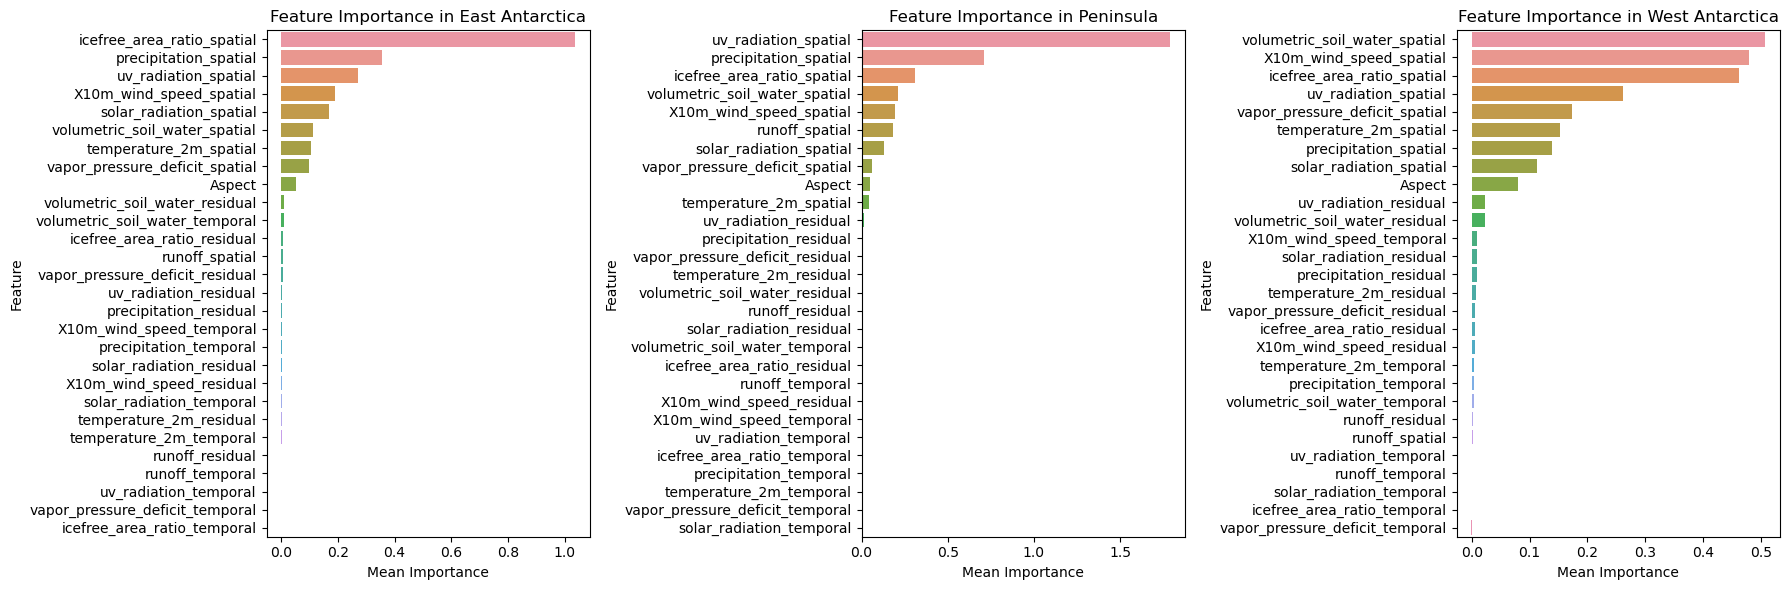

C:\Users\hyou34\AppData\Local\Temp\ipykernel_19408\2393172793.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


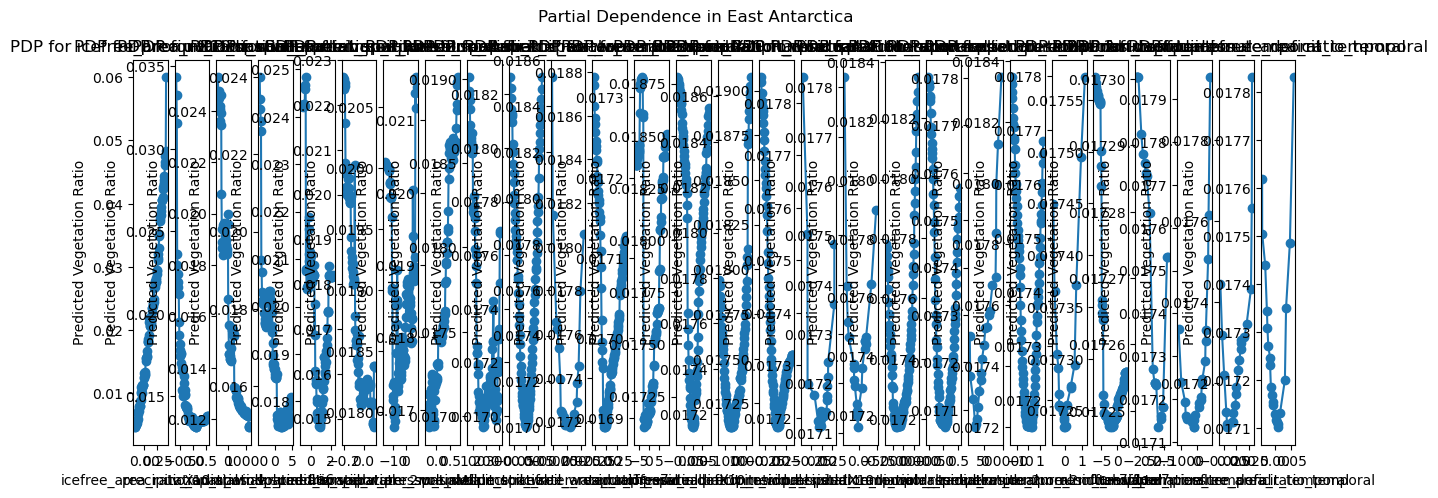

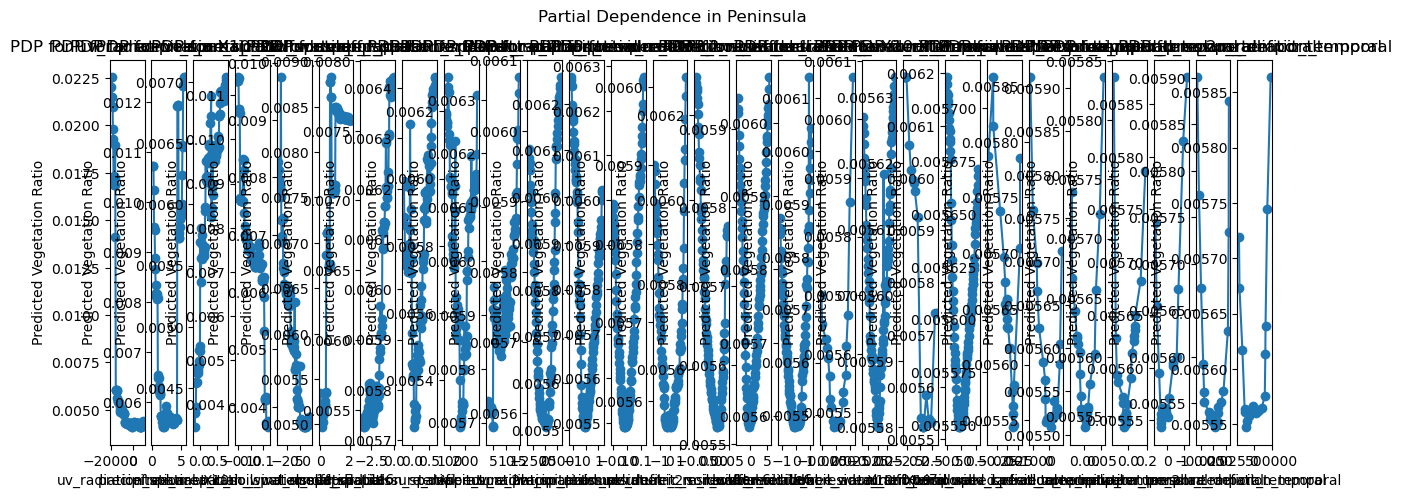

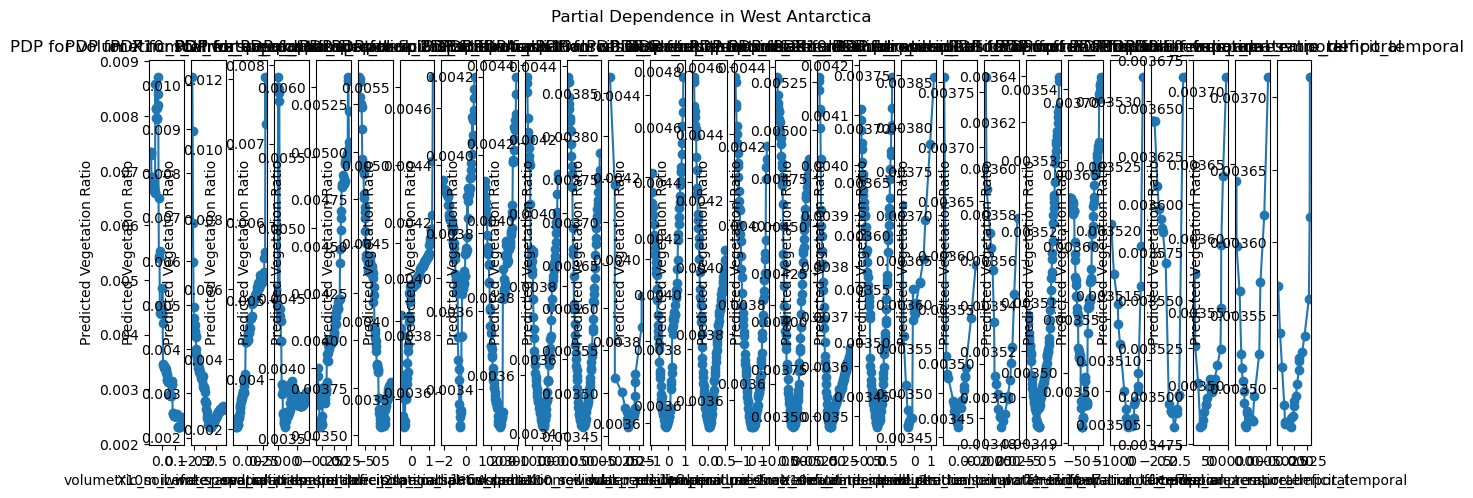

Feature importance saved for East Antarctica: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\Regional_feature_importance_East Antarctica.csv
Feature importance saved for Peninsula: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\Regional_feature_importance_Peninsula.csv
Feature importance saved for West Antarctica: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\Regional_feature_importance_West Antarctica.csv
PDP results saved for East Antarctica - icefree_area_ratio_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_East Antarctica_icefree_area_ratio_spatial.csv
PDP results saved for East Antarctica - precipitation_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_East Antarctica_precipitation_spatial.csv
PDP results saved for East Antarctica - uv_radiation_spatial: G:\Hangkai\Anttarctic Vege

PDP results saved for Peninsula - temperature_2m_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_Peninsula_temperature_2m_spatial.csv
PDP results saved for Peninsula - uv_radiation_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_Peninsula_uv_radiation_residual.csv
PDP results saved for Peninsula - precipitation_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_Peninsula_precipitation_residual.csv
PDP results saved for Peninsula - vapor_pressure_deficit_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_Peninsula_vapor_pressure_deficit_residual.csv
PDP results saved for Peninsula - temperature_2m_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_Peninsula_temperature_2m_resid

PDP results saved for West Antarctica - runoff_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_West Antarctica_runoff_residual.csv
PDP results saved for West Antarctica - runoff_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_West Antarctica_runoff_spatial.csv
PDP results saved for West Antarctica - uv_radiation_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_West Antarctica_uv_radiation_temporal.csv
PDP results saved for West Antarctica - runoff_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_West Antarctica_runoff_temporal.csv
PDP results saved for West Antarctica - solar_radiation_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_results\Partial_dependence_West Antarctica_solar_radiation_tempo

In [7]:
import seaborn as sns
from tqdm import tqdm
import os
# === Step 3: Visualization of Feature Importance ===
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, region in enumerate(feature_importance_results.keys()):
    sns.barplot(data=feature_importance_results[region], x='Importance', y='Feature', ax=axes[i])
    axes[i].set_title(f"Feature Importance in {region}")
    axes[i].set_xlabel("Mean Importance")
    axes[i].set_ylabel("Feature")
plt.tight_layout()
plt.show()

# === Step 4: Visualization of Partial Dependence ===
for region, pdp_data in pdp_results.items():
    fig, axes = plt.subplots(1, len(pdp_data), figsize=(15, 5))
    fig.suptitle(f"Partial Dependence in {region}")

    for i, (feature, data) in enumerate(pdp_data.items()):
        axes[i].plot(data['values'], data['partial_dependence'], marker='o', linestyle='-')
        axes[i].set_title(f"PDP for {feature}")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Predicted Vegetation Ratio")

    plt.tight_layout()
    plt.show()

# === Step 5: Save Feature Importance Results ===
for region, df in feature_importance_results.items():
    file_path = f'G:\\Hangkai\\Anttarctic Vegetation Dynamic\\RF_trainning_data\\cleared_data\\Regional_feature_importance_{region}.csv'
    df.to_csv(file_path, index=False)
    print(f"Feature importance saved for {region}: {file_path}")
    

# Define the base directory for saving PDP results
pdp_save_dir = "G:\\Hangkai\\Anttarctic Vegetation Dynamic\\RF_trainning_data\\cleared_data\\pdp_results"
os.makedirs(pdp_save_dir, exist_ok=True)

# Save PDP results
for region, pdp_data in pdp_results.items():
    for feature, data in pdp_data.items():
        file_path = os.path.join(pdp_save_dir, f'Partial_dependence_{region}_{feature}.csv')
        pd.DataFrame(data).to_csv(file_path, index=False)
        print(f"PDP results saved for {region} - {feature}: {file_path}")


In [17]:
# === Step 6: Run Predictions with Detrended Variables ===
all_combinations = list(itertools.chain(*[itertools.combinations(base_variables, r)
                                          for r in range(1, len(base_variables) + 1)]))

yearly_areas = []
# Load the full dataset
file_path = r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv'
df = pd.read_csv(file_path)

def classify_region(region):
    """Classify regions into Peninsula, East Antarctica, or West Antarctica"""
    if 'peninsula' in region.lower():
        return 'Peninsula'
    elif 'east' in region.lower():
        return 'East Antarctica'
    else:
        return 'West Antarctica'

df['Region_Class'] = df['Regions'].apply(classify_region)

for region, rf_model in region_models.items():
    print(f"\nProcessing {region}...")
    region_df = df[df['Region_Class'] == region].copy()
    
    for combination in tqdm(all_combinations, desc=f"Running {region}"):
        df_full = region_df.copy()

        # Load detrended data
        for var in combination:
            path = f'G:\\Hangkai\\Anttarctic Vegetation Dynamic\\RF_trainning_data\\cleared_data\\detrended_{var}.csv'
            detrended_data = pd.read_csv(path)

            for component in ['temporal', 'residual']:
                col_name = f"{var}_{component}"
                if col_name in detrended_data.columns:
                    df_full[col_name] = detrended_data[col_name]

        # Select predictors
        predictors = [col for col in rf_model.feature_names_in_ if col in df_full.columns]
        X = df_full[predictors]

        # Predict vegetation area ratio and compute actual area
        df_full['predicted_ratio'] = rf_model.predict(X)
        df_full['predicted_area'] = df_full['land_area'] * df_full['predicted_ratio']

        # Aggregate results by year
        yearly_area = df_full.groupby('year')['predicted_area'].sum().reset_index(name='total_predicted_area')
        yearly_area['Region'] = region
        yearly_area['variables'] = ', '.join(combination)
        yearly_areas.append(yearly_area)

# Save results
yearly_area_results = pd.concat(yearly_areas, ignore_index=True)
output_path = r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\Regiopnal_yearly_area_results_by_region.csv'
yearly_area_results.to_csv(output_path, index=False)
print(f"\nData saved to {output_path}")


Processing East Antarctica...


Running East Antarctica: 100%|█████████████████████████████| 255/255 [2:19:09<00:00, 32.74s/it]



Processing Peninsula...


Running Peninsula: 100%|███████████████████████████████████| 255/255 [2:04:53<00:00, 29.39s/it]



Processing West Antarctica...


Running West Antarctica: 100%|█████████████████████████████| 255/255 [2:06:16<00:00, 29.71s/it]



Data saved to G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\Regiopnal_yearly_area_results_by_region.csv


In [22]:
# === Step 7: Statistical Analysis ===
results_analysis = []

for (region, variables), group in yearly_area_results.groupby(['Region', 'variables']):
    predicted_area = group.set_index('year')['total_predicted_area']
    
    # Mann-Kendall trend test
    mk_result = mk.original_test(predicted_area)
    
    # Store results
    results_analysis.append({
        'Region': region,
        'variables': variables,
        'Trend p-value': mk_result.p,
        'Trend is Significant': mk_result.p < 0.05
    })

# Convert to DataFrame and save
evaluation_results = pd.DataFrame(results_analysis)
evaluation_path = r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\evaluation_results_by_region.csv'
evaluation_results.to_csv(evaluation_path, index=False)
print(f"Evaluation results saved to {evaluation_path}")

Evaluation results saved to G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\evaluation_results_by_region.csv


In [21]:
yearly_area_results

,year,total_predicted_area,Region,variables
0,2002,4964.398244,East Antarctica,temperature_2m
1,2003,5569.061408,East Antarctica,temperature_2m
2,2004,5808.895708,East Antarctica,temperature_2m
3,2005,5689.333469,East Antarctica,temperature_2m
4,2006,5644.307681,East Antarctica,temperature_2m
...,...,...,...,...
16825,2019,1719.697412,West Antarctica,"temperature_2m, solar_radiation, uv_radiation,..."
16826,2020,1256.835081,West Antarctica,"temperature_2m, solar_radiation, uv_radiation,..."
16827,2021,1241.596535,West Antarctica,"temperature_2m, solar_radiation, uv_radiation,..."
16828,2022,1741.752069,West Antarctica,"temperature_2m, solar_radiation, uv_radiation,..."


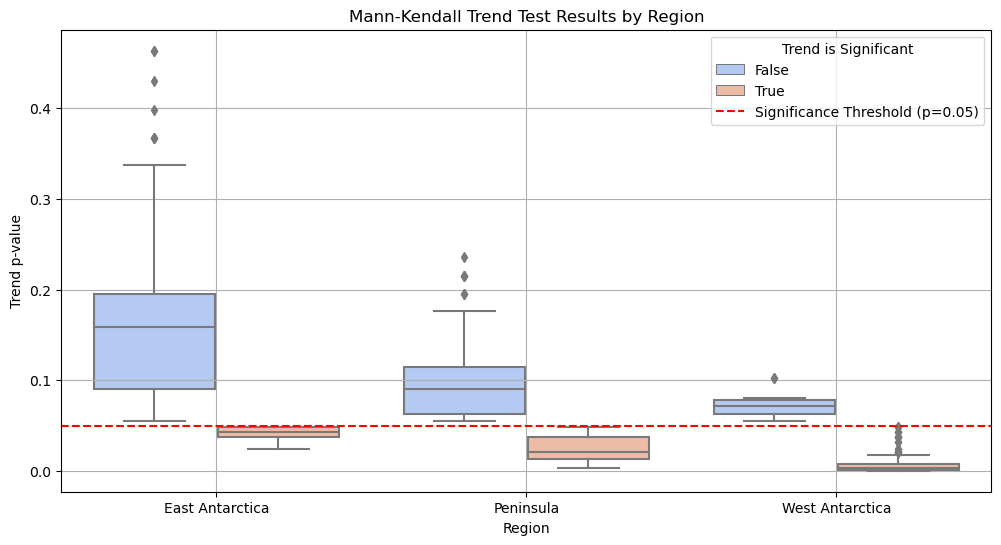

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the evaluation results
evaluation_path = r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\evaluation_results_by_region.csv'
evaluation_results = pd.read_csv(evaluation_path)

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot the trend significance across different regions
sns.boxplot(x='Region', y='Trend p-value', data=evaluation_results, hue='Trend is Significant', palette='coolwarm')

# Customize the plot
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
plt.title('Mann-Kendall Trend Test Results by Region')
plt.xlabel('Region')
plt.ylabel('Trend p-value')
plt.legend(title='Trend is Significant')
plt.grid(True)
plt.show()

In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv'
df = pd.read_csv(file_path)

In [3]:
df

,Num,Regions,Subregions,pixel,year,land_area,latitude,longitude,vegetation_area_ratio,Aspect,...,vapor_pressure_deficit_temporal,temperature_2m_residual,uv_radiation_residual,icefree_area_ratio_residual,solar_radiation_residual,volumetric_soil_water_residual,runoff_residual,X10m_wind_speed_residual,precipitation_residual,vapor_pressure_deficit_residual
0,1,East,A-Ap,2699,2002,44.207058,-69.1,32.6,0.0,270.08640,...,-0.018312,0.073730,1939.279460,0.073423,580760.9781,0.012862,-1.110000e-06,0.807227,-0.304913,0.110505
1,2,East,A-Ap,2699,2003,44.207058,-69.1,32.6,0.0,270.08640,...,-0.006479,0.453469,-5701.908474,0.223030,-908841.5965,0.007255,1.840000e-06,0.923235,0.109344,0.021176
2,3,East,A-Ap,2699,2004,44.207058,-69.1,32.6,0.0,270.08640,...,0.009011,1.137963,273.515311,0.212150,118706.1167,0.000422,7.020000e-06,0.426655,-0.092716,0.024884
3,4,East,A-Ap,2699,2005,44.207058,-69.1,32.6,0.0,270.08640,...,0.020433,-1.396641,-2428.009145,-0.182266,239528.4947,-0.004649,6.250000e-06,-2.053520,-0.777708,0.027147
4,5,East,A-Ap,2699,2006,44.207058,-69.1,32.6,0.0,270.08640,...,0.010030,-0.576843,652.416679,-0.497144,506683.8413,-0.018171,3.220000e-06,-0.254173,-0.315633,0.080629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886551,886552,West,J-Jpp,39943,2019,3.460056,-88.4,-96.0,0.0,323.30237,...,0.015887,-0.706300,248.911821,-0.111171,125073.7564,-0.005762,-3.460000e-07,-0.005574,-0.048132,-0.016344
886552,886553,West,J-Jpp,39943,2020,3.460056,-88.4,-96.0,0.0,323.30237,...,-0.002552,0.443918,-368.278573,-0.054786,-569729.6606,-0.002471,9.720000e-08,0.347505,0.039725,0.002999
886553,886554,West,J-Jpp,39943,2021,3.460056,-88.4,-96.0,0.0,323.30237,...,-0.000135,-1.423950,-362.790674,-0.060663,-106917.4675,-0.038653,-6.240000e-08,-0.506747,-0.117922,-0.001062
886554,886555,West,J-Jpp,39943,2022,3.460056,-88.4,-96.0,0.0,323.30237,...,-0.008153,-1.369588,-60.624265,-0.099841,123305.7485,-0.046149,-6.090000e-08,-0.185785,-0.119477,0.006721


In [6]:
import pandas as pd
from scipy.stats import kendalltau

# Calculate vegetation area
df['vegetation_area'] = df['vegetation_area_ratio'] * df['land_area']

# Group by region and year, summing the vegetation area
region_yearly_veg = df.groupby(['Regions', 'year'])['vegetation_area'].sum().reset_index()

# Apply Mann-Kendall test (using scipy's kendalltau) for each region
results = []
for region in region_yearly_veg['Regions'].unique():
    region_data = region_yearly_veg[region_yearly_veg['Regions'] == region].sort_values(by='year')
    tau, p_value = kendalltau(region_data['year'], region_data['vegetation_area'])
    results.append({
        'Region': region,
        'Kendall_tau': tau,
        'p_value': p_value,
        'Significant': p_value < 0.05
    })

# Convert results to a DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Save to CSV
results_df.to_csv("mann_kendall_results.csv", index=False)


      Region  Kendall_tau   p_value  Significant
0       East     0.316017  0.041289         True
1  Peninsula     0.445887  0.003207         True
2       West     0.419913  0.005759         True


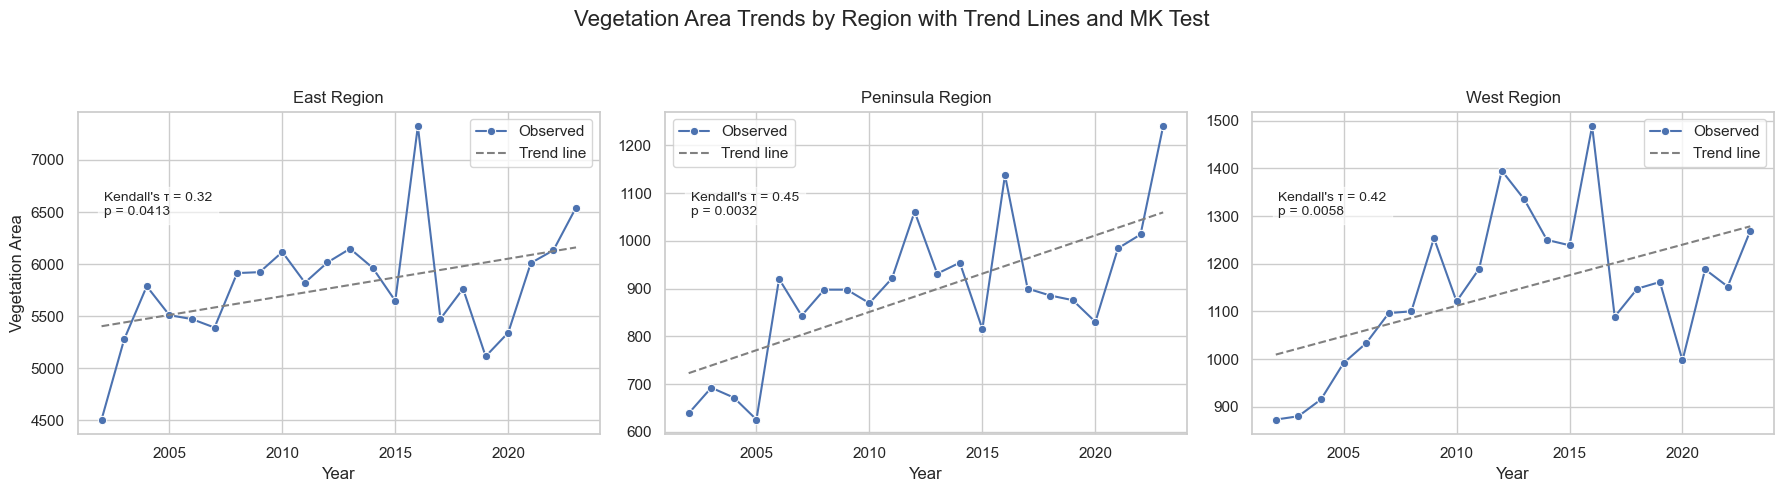

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate vegetation area
df['vegetation_area'] = df['vegetation_area_ratio'] * df['land_area']

# Group by region and year
region_yearly_veg = df.groupby(['Regions', 'year'])['vegetation_area'].sum().reset_index()

# Set up plot style
sns.set(style="whitegrid")
regions = region_yearly_veg['Regions'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=False)

for i, region in enumerate(regions):
    region_data = region_yearly_veg[region_yearly_veg['Regions'] == region].sort_values(by='year')
    
    # Plot actual data
    sns.lineplot(ax=axes[i], data=region_data, x='year', y='vegetation_area', marker="o", label='Observed')

    # Fit and plot linear trend line
    z = np.polyfit(region_data['year'], region_data['vegetation_area'], 1)
    p = np.poly1d(z)
    axes[i].plot(region_data['year'], p(region_data['year']), linestyle='--', color='gray', label='Trend line')

    # MK test
    tau, p_value = kendalltau(region_data['year'], region_data['vegetation_area'])

    # Annotate with MK test results
    annotation = f"Kendall's τ = {tau:.2f}\np = {p_value:.4f}"
    axes[i].text(0.05, 0.75, annotation, transform=axes[i].transAxes,
                 fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

    # Labels
    axes[i].set_title(f"{region} Region")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Vegetation Area" if i == 0 else "")
    axes[i].legend()

# Add main title and layout adjustments
plt.suptitle("Vegetation Area Trends by Region with Trend Lines and MK Test", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

In [20]:
import pandas as pd

# To display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(region_yearly_veg)

      Regions  year  vegetation_area
0        East  2002      4508.250000
1        East  2003      5277.500000
2        East  2004      5787.750001
3        East  2005      5510.500000
4        East  2006      5472.500000
5        East  2007      5391.250000
6        East  2008      5914.000000
7        East  2009      5923.000000
8        East  2010      6116.750000
9        East  2011      5822.250000
10       East  2012      6016.500000
11       East  2013      6148.000001
12       East  2014      5964.500001
13       East  2015      5647.500001
14       East  2016      7323.750001
15       East  2017      5475.500000
16       East  2018      5764.000000
17       East  2019      5114.750001
18       East  2020      5342.750001
19       East  2021      6010.500000
20       East  2022      6133.250001
21       East  2023      6543.000002
22  Peninsula  2002       638.750000
23  Peninsula  2003       692.500000
24  Peninsula  2004       671.749999
25  Peninsula  2005       625.750000
2

In [26]:
import pandas as pd

# Load the uploaded CSV file
file_path = r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df_solar_Peninsula_duration.csv'
df = pd.read_csv(file_path)

# Show the first few rows to understand its structure
df.head()

,Num,Regions,Subregions,pixel,year,latitude,longitude,vegetation_area_ratio,land_area,vegetation_duration,Aspect,temperature_2m_spatial,uv_radiation_spatial,solar_radiation_spatial,icefree_area_ratio_spatial,volumetric_soil_water_spatial,runoff_spatial,X10m_wind_speed_spatial,precipitation_spatial,vapor_pressure_deficit_spatial,temperature_2m_temporal,uv_radiation_temporal,solar_radiation_temporal,icefree_area_ratio_temporal,volumetric_soil_water_temporal,runoff_temporal,X10m_wind_speed_temporal,precipitation_temporal,vapor_pressure_deficit_temporal,temperature_2m_residual,uv_radiation_residual,solar_radiation_residual,icefree_area_ratio_residual,volumetric_soil_water_residual,runoff_residual,X10m_wind_speed_residual,precipitation_residual,vapor_pressure_deficit_residual
0,1,Peninsula,Hp-I,922,2002,-68.9,-70.3,0.000000,44.610893,0.0,232.80064,4.297243,-17393.28996,-826930.4991,-0.466743,-0.309794,-0.000005,-0.498198,2.920535,0.164265,-1.063919,770.752549,1.578902e+05,0.006110,0.011141,1.870000e-06,-0.449352,-0.743491,-0.044410,0.305486,-299.257913,-1.055075e+06,-0.000506,-0.011141,-1.870000e-06,-0.039806,-0.287159,0.096056
1,2,Peninsula,Hp-I,922,2003,-68.9,-70.3,0.005604,44.610893,1.0,232.80064,4.297243,-17393.28996,-826930.4991,-0.466743,-0.309794,-0.000005,-0.498198,2.920535,0.164265,-1.057226,2100.082900,1.168670e+06,-0.016572,0.011537,-8.020000e-07,-0.173378,-0.790223,-0.030716,0.088629,-2612.193264,2.845689e+05,0.010968,-0.011537,8.020000e-07,-0.003352,-0.447627,0.071164
2,3,Peninsula,Hp-I,922,2004,-68.9,-70.3,0.000000,44.610893,0.0,232.80064,4.297243,-17393.28996,-826930.4991,-0.466743,-0.309794,-0.000005,-0.498198,2.920535,0.164265,0.595522,957.657152,-3.778569e+05,0.003971,0.015691,1.260000e-06,0.157917,0.217695,0.062665,-0.131443,11242.592480,7.686046e+05,-0.026387,-0.015691,-1.260000e-06,-0.226463,0.251455,-0.065498
3,4,Peninsula,Hp-I,922,2005,-68.9,-70.3,0.000000,44.610893,0.0,232.80064,4.297243,-17393.28996,-826930.4991,-0.466743,-0.309794,-0.000005,-0.498198,2.920535,0.164265,0.599571,808.054082,-2.184911e+05,0.075540,0.018451,1.580000e-06,0.151884,0.182587,0.029751,-0.078346,8031.515554,2.762367e+05,-0.075540,-0.018451,-1.580000e-06,-0.005798,0.489463,-0.067142
4,5,Peninsula,Hp-I,922,2006,-68.9,-70.3,0.005604,44.610893,2.0,232.80064,4.297243,-17393.28996,-826930.4991,-0.466743,-0.309794,-0.000005,-0.498198,2.920535,0.164265,1.130923,1045.831982,-5.251253e+03,-0.052553,0.016306,8.690000e-07,-0.052250,-0.244423,0.108290,-0.222495,-2369.507345,-7.605260e+05,0.052553,-0.016306,-8.690000e-07,-0.201895,0.126573,0.040229


In [27]:
# Filter out rows where vegetation_area_ratio is 0
filtered_df = df[df["vegetation_area_ratio"] > 0]

# Group by year and compute the land-area weighted vegetation duration
weighted_duration_by_year = (
    filtered_df.groupby("year")
    .apply(lambda g: (g["vegetation_duration"] * g["land_area"]).sum() / g["land_area"].sum())
    .reset_index(name="land_area_weighted_vegetation_duration")
)

# Display the result
weighted_duration_by_year

,year,land_area_weighted_vegetation_duration
0,2002,15.424707
1,2003,16.365074
2,2004,17.815473
3,2005,19.104779
4,2006,17.893654
5,2007,20.947117
6,2008,19.136352
7,2009,19.429481
8,2010,18.169532
9,2011,23.929675
